In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import calendar
import time
plt.style.use('ggplot')
start_time = dt.datetime.now()
%matplotlib inline

/Users/dl/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
%%time
data=pd.read_csv('applications data.csv')
data.shape

CPU times: user 1.68 s, sys: 175 ms, total: 1.86 s
Wall time: 1.6 s


(1000000, 10)

In [3]:
data.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0


In [4]:
data.describe(include='all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


In [5]:
def count_zeros(data):
    count=0
    for i in data:
        if i==0:
            count+=1
    return count

In [6]:
statistics_of_data = []
for col in ['record','ssn','firstname','lastname','address','zip5','homephone','fraud_label']:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_df

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,record,categorical,1000000,100.0%,0,1000000,1
1,ssn,categorical,1000000,100.0%,0,835819,999999999
2,firstname,categorical,1000000,100.0%,0,78136,EAMSTRMT
3,lastname,categorical,1000000,100.0%,0,177001,ERJSAXA
4,address,categorical,1000000,100.0%,0,828774,123 MAIN ST
5,zip5,categorical,1000000,100.0%,0,26370,68138
6,homephone,categorical,1000000,100.0%,0,28244,9999999999
7,fraud_label,categorical,1000000,100.0%,985607,2,0


In [7]:
statistics_of_data1 = []
for col in ['date','dob']:
    statistics_of_data1.append((col,
                             'datetime',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100}%',
                             count_zeros(data[col]),
                             data[col].min(),
                             data[col].max(),
                             data[col].mode()[0]
                            
                             ))

stats_df1 = pd.DataFrame(statistics_of_data1, columns=['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','Min', 'Max','Most Common',])
stats_df1

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Most Common
0,date,datetime,1000000,100.0%,0,20170101,20171231,20170816
1,dob,datetime,1000000,100.0%,0,19000101,20161031,19070626


# Data Preparation

In [8]:
#Convert Date
data['date']=pd.to_datetime(data.date.astype(str).apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:]))
data['dob_dt']=pd.to_datetime(data.dob.astype(str).apply(lambda x: x[:4]+'-'+x[4:6]+'-'+x[6:]))
#right alignment 
data['zip5']=data['zip5'].apply(lambda x:'{0:0>5}'.format(x))
#Fix frivolous Values
data.loc[data['address']=='123 MAIN ST','address']=data.loc[data['address']=='123 MAIN ST','record']\
.apply(lambda x:str(x)+'RECORD')
data.loc[data['ssn']==999999999,'ssn']=-data.loc[data['ssn']==999999999,'record']
data['ssn']=data['ssn'].apply(lambda x:'{0:0>9}'.format(x))
data.loc[data['dob']==19070626,'dob']=-data.loc[data.dob==19070626,'record']
data['dob']=data['dob'].apply(lambda x:'{0:0>8}'.format(x))
data.loc[data['homephone']==9999999999,'homephone']=-data.loc[data.homephone==9999999999,'record']
data['homephone']=data['homephone'].apply(lambda x:'{0:0>10}'.format(x))

In [9]:
data.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,dob_dt
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,1907-06-26
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,1934-06-15
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,1907-06-26
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,1944-04-30
4,5,2017-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,1998-03-15


In [10]:
data['age_when_apply']=data['date'].dt.year-data['dob_dt'].dt.year

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   record          1000000 non-null  int64         
 1   date            1000000 non-null  datetime64[ns]
 2   ssn             1000000 non-null  object        
 3   firstname       1000000 non-null  object        
 4   lastname        1000000 non-null  object        
 5   address         1000000 non-null  object        
 6   zip5            1000000 non-null  object        
 7   dob             1000000 non-null  object        
 8   homephone       1000000 non-null  object        
 9   fraud_label     1000000 non-null  int64         
 10  dob_dt          1000000 non-null  datetime64[ns]
 11  age_when_apply  1000000 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(7)
memory usage: 91.6+ MB


In [12]:
#Day of Week Target Encoding
data['dow']=data.date.apply(lambda x: calendar.day_name[x.weekday()])

In [13]:
# Separate the OOT
train_set=data[data.date<'2017-11-01']

In [14]:
#Statistical Smoothing
c=4;nmid=20;y_avg=train_set['fraud_label'].mean()
y_dow=train_set.groupby('dow')['fraud_label'].mean()
num=train_set.groupby('dow').size()
y_dow_smooth=y_avg+(y_dow-y_avg)/(1+np.exp(-(num-nmid)/c))
data['dow_risk']=data.dow.map(y_dow_smooth)

In [15]:
# delete files that we don't need any more to free up memory
del train_set

In [16]:
y_dow=y_dow.reset_index()
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y_dow['dow']=pd.Categorical(y_dow['dow'],categories=cats,ordered=True)
y_dow=y_dow.sort_values('dow')
y_dow=y_dow.set_index('dow')

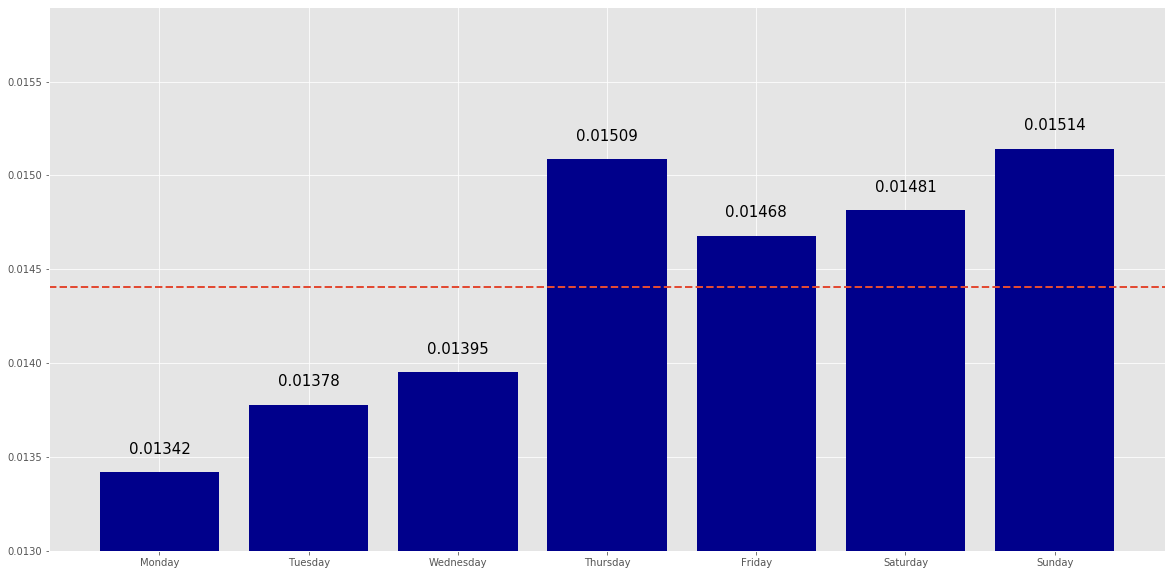

In [17]:
#plot
fig,ax=plt.subplots(figsize=(20,10))
plt.bar(data=y_dow,x=y_dow.index,height='fraud_label',color='darkblue')
ax.set_ylim(bottom=.013)
ax.axhline(y=y_avg,ls='--',lw=2)

for i in (y_dow.index):
    ax.text(i,y_dow.loc[i,'fraud_label']+0.0001,round(y_dow.loc[i,'fraud_label'],5),horizontalalignment='center',fontsize=15)


plt.savefig('risktable.png')
plt.show()

In [18]:
# Make new entities for variables
data['name']=data.firstname+data.lastname
data['fulladdress']=data.address+data.zip5
data['name_dob']=data.name+data.dob
data['name_fulladdress']=data.name+data.address
data['name_homephone']=data.name+data.homephone
data['fulladdress_dob']=data.address+data.dob
data['fulladdress_homephone']=data.address+data.homephone
data['dob_homephone']=data.dob+data.homephone
data['homephone_name_dob']=data.homephone+data.name_dob

In [19]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dob_dt', 'age_when_apply', 'dow',
       'dow_risk', 'name', 'fulladdress', 'name_dob', 'name_fulladdress',
       'name_homephone', 'fulladdress_dob', 'fulladdress_homephone',
       'dob_homephone', 'homephone_name_dob'],
      dtype='object')

In [20]:
for i in list(data.iloc[:,np.r_[3:9,14:17]]):
    data['ssn_'+i]=data.ssn+data[i]

In [21]:
data.columns

Index(['record', 'date', 'ssn', 'firstname', 'lastname', 'address', 'zip5',
       'dob', 'homephone', 'fraud_label', 'dob_dt', 'age_when_apply', 'dow',
       'dow_risk', 'name', 'fulladdress', 'name_dob', 'name_fulladdress',
       'name_homephone', 'fulladdress_dob', 'fulladdress_homephone',
       'dob_homephone', 'homephone_name_dob', 'ssn_firstname', 'ssn_lastname',
       'ssn_address', 'ssn_zip5', 'ssn_dob', 'ssn_homephone', 'ssn_name',
       'ssn_fulladdress', 'ssn_name_dob'],
      dtype='object')

In [22]:
attributes=list(data.iloc[:,np.r_[2, 5, 6, 7, 8, 14:32]].columns)

In [23]:
attributes

['ssn',
 'address',
 'zip5',
 'dob',
 'homephone',
 'name',
 'fulladdress',
 'name_dob',
 'name_fulladdress',
 'name_homephone',
 'fulladdress_dob',
 'fulladdress_homephone',
 'dob_homephone',
 'homephone_name_dob',
 'ssn_firstname',
 'ssn_lastname',
 'ssn_address',
 'ssn_zip5',
 'ssn_dob',
 'ssn_homephone',
 'ssn_name',
 'ssn_fulladdress',
 'ssn_name_dob']

In [24]:
len(attributes)

23

# Creating Variables

In [25]:
df=data.copy()
vars=data.copy()
df['check_date']=df.date
df['check_record']=df.record
numvars = 1
vars.shape

(1000000, 32)

## Velocity/counts and days since

In [26]:
begin=time.time()
for i in attributes:
    st=time.time()
    df_1=df[['record','date',i]]
    df_r=df[['check_record','check_date',i]]
    temp=pd.merge(df_1,df_r,left_on=i,right_on=i)
    
    #day since
    day_since_df=temp[temp.record>temp.check_record][['record','date','check_date']]\
    .groupby('record')[['date','check_date']].last()
    mapper=(day_since_df.date-day_since_df.check_date).dt.days
    vars[i+'_day_since']=vars.record.map(mapper)
    vars[i+'_day_since'].fillna(365,inplace=True)
    print(f'\n{i}_day_since --->Done')
    
    #Velocity
    for v in [0,1,3,7,14,30]:
        count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(v)))
                          &(temp.record>=temp.check_record)]
        col_name=f'{i}_count_{v}'
        mapper2=count_day_df.groupby('record')[i].count()
        vars[col_name]=vars.record.map(mapper2)
        print(f'{i}_count_{str(v)} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st:0.2f}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')


ssn_day_since --->Done
ssn_count_0 --->Done
ssn_count_1 --->Done
ssn_count_3 --->Done
ssn_count_7 --->Done
ssn_count_14 --->Done
ssn_count_30 --->Done
Run time for entity ssn--------3.45s

address_day_since --->Done
address_count_0 --->Done
address_count_1 --->Done
address_count_3 --->Done
address_count_7 --->Done
address_count_14 --->Done
address_count_30 --->Done
Run time for entity address--------3.53s

zip5_day_since --->Done
zip5_count_0 --->Done
zip5_count_1 --->Done
zip5_count_3 --->Done
zip5_count_7 --->Done
zip5_count_14 --->Done
zip5_count_30 --->Done
Run time for entity zip5--------60.15s

dob_day_since --->Done
dob_count_0 --->Done
dob_count_1 --->Done
dob_count_3 --->Done
dob_count_7 --->Done
dob_count_14 --->Done
dob_count_30 --->Done
Run time for entity dob--------25.51s

homephone_day_since --->Done
homephone_count_0 --->Done
homephone_count_1 --->Done
homephone_count_3 --->Done
homephone_count_7 --->Done
homephone_count_14 --->Done
homephone_count_30 --->Done
Run time

In [27]:
numvars_new = len(vars.columns)- 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 161   total variables: 162


In [28]:
# relative velocity
start=time.time()
for i in attributes:
    for d in ['0','1']:
        for dd in ['3','7','14','30']:
            vars[i+'_count_'+d+'_by_'+dd]=vars[i + '_count_' + d]/(vars[i+'_count_'+dd]/float(dd))
print(f'Total run time:{time.time()-start:0.2f}s')

Total run time:2.17s


In [29]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 184   total variables: 346


## Counts by entities 

In [30]:
# this cell makes twice as many variables as needed. It makes each variable twice because of the loop logic. 
# It would be nice to fix this.
# If anybody ever fixes this cell please send me an email.
begin=time.time()
for i in attributes:
    for v in attributes:
        st=time.time()
        if i==v:
            continue
        else:
            df_c=df[['record','date',i]]
            df_d=df[['check_record','check_date',i,v]]
            temp=pd.merge(df_c,df_d,left_on=i,right_on=i)
        
        #number of unique for particular field
        for t in[0,1,3,7,14,30,60]:
            count_day_df=temp[((temp.check_date)>=(temp.date-dt.timedelta(t)))
                          &(temp.record>=temp.check_record)]
            col_name=f'{i}_unique_count_for_{v}_{t}'
            mapper=count_day_df.groupby(['record'])[v].nunique()
            vars[col_name]=vars.record.map(mapper)
        
        print(f'Run time for entity {i} in field {v}--------{time.time()-st:0.2f}s')
        
    print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Run time for entity ssn in field address--------6.76s
Run time for entity ssn in field zip5--------6.18s
Run time for entity ssn in field dob--------6.36s
Run time for entity ssn in field homephone--------6.43s
Run time for entity ssn in field name--------6.39s
Run time for entity ssn in field fulladdress--------6.69s
Run time for entity ssn in field name_dob--------9.65s
Run time for entity ssn in field name_fulladdress--------6.67s
Run time for entity ssn in field name_homephone--------6.61s
Run time for entity ssn in field fulladdress_dob--------6.71s
Run time for entity ssn in field fulladdress_homephone--------6.68s
Run time for entity ssn in field dob_homephone--------6.56s
Run time for entity ssn in field homephone_name_dob--------6.97s
Run time for entity ssn in field ssn_firstname--------6.60s
Run time for entity ssn in field ssn_lastname--------6.49s
Run time for entity ssn in field ssn_address--------6.72s
Run time for entity ssn in field ssn_zip5--------6.89s
Run time for e

Run time for entity fulladdress in field address--------6.92s
Run time for entity fulladdress in field zip5--------6.12s
Run time for entity fulladdress in field dob--------6.46s
Run time for entity fulladdress in field homephone--------6.63s
Run time for entity fulladdress in field name--------6.38s
Run time for entity fulladdress in field name_dob--------6.95s
Run time for entity fulladdress in field name_fulladdress--------6.54s
Run time for entity fulladdress in field name_homephone--------6.73s
Run time for entity fulladdress in field fulladdress_dob--------6.96s
Run time for entity fulladdress in field fulladdress_homephone--------7.08s
Run time for entity fulladdress in field dob_homephone--------6.94s
Run time for entity fulladdress in field homephone_name_dob--------34.22s
Run time for entity fulladdress in field ssn_firstname--------7.01s
Run time for entity fulladdress in field ssn_lastname--------6.67s
Run time for entity fulladdress in field ssn_address--------6.95s
Run ti

Run time for entity fulladdress_homephone in field fulladdress_dob--------7.02s
Run time for entity fulladdress_homephone in field dob_homephone--------6.82s
Run time for entity fulladdress_homephone in field homephone_name_dob--------6.91s
Run time for entity fulladdress_homephone in field ssn_firstname--------58.92s
Run time for entity fulladdress_homephone in field ssn_lastname--------7.19s
Run time for entity fulladdress_homephone in field ssn_address--------6.90s
Run time for entity fulladdress_homephone in field ssn_zip5--------6.65s
Run time for entity fulladdress_homephone in field ssn_dob--------6.47s
Run time for entity fulladdress_homephone in field ssn_homephone--------6.77s
Run time for entity fulladdress_homephone in field ssn_name--------7.11s
Run time for entity fulladdress_homephone in field ssn_fulladdress--------6.64s
Run time for entity fulladdress_homephone in field ssn_name_dob--------7.47s
Total run time:151.15min
Run time for entity dob_homephone in field ssn---

Run time for entity ssn_address in field ssn_dob--------6.82s
Run time for entity ssn_address in field ssn_homephone--------7.09s
Run time for entity ssn_address in field ssn_name--------6.85s
Run time for entity ssn_address in field ssn_fulladdress--------7.28s
Run time for entity ssn_address in field ssn_name_dob--------8.28s
Total run time:173.01min
Run time for entity ssn_zip5 in field ssn--------7.41s
Run time for entity ssn_zip5 in field address--------7.11s
Run time for entity ssn_zip5 in field zip5--------7.30s
Run time for entity ssn_zip5 in field dob--------6.49s
Run time for entity ssn_zip5 in field homephone--------6.54s
Run time for entity ssn_zip5 in field name--------7.31s
Run time for entity ssn_zip5 in field fulladdress--------83.32s
Run time for entity ssn_zip5 in field name_dob--------7.29s
Run time for entity ssn_zip5 in field name_fulladdress--------7.97s
Run time for entity ssn_zip5 in field name_homephone--------8.01s
Run time for entity ssn_zip5 in field fulladd

Run time for entity ssn_name_dob in field name_homephone--------7.62s
Run time for entity ssn_name_dob in field fulladdress_dob--------7.09s
Run time for entity ssn_name_dob in field fulladdress_homephone--------7.18s
Run time for entity ssn_name_dob in field dob_homephone--------6.95s
Run time for entity ssn_name_dob in field homephone_name_dob--------7.38s
Run time for entity ssn_name_dob in field ssn_firstname--------7.30s
Run time for entity ssn_name_dob in field ssn_lastname--------6.86s
Run time for entity ssn_name_dob in field ssn_address--------7.11s
Run time for entity ssn_name_dob in field ssn_zip5--------7.02s
Run time for entity ssn_name_dob in field ssn_dob--------7.20s
Run time for entity ssn_name_dob in field ssn_homephone--------6.50s
Run time for entity ssn_name_dob in field ssn_name--------116.99s
Run time for entity ssn_name_dob in field ssn_fulladdress--------8.90s
Total run time:203.82min


In [31]:
del df

In [32]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 3542   total variables: 3888


In [33]:
print('time to here: ',dt.datetime.now() - start_time)

time to here:  3:27:19.216567


In [34]:
# # This works to remove duplicate columns from a very large dataframe, but it takes a long time
# # for a df shape 1,000,000 by 4,000 it takes 10 hours on my macbook

# def duplicate_columns(frame):
#     groups = frame.columns.to_series().groupby(frame.dtypes).groups
#     dups = []

#     for t, v in groups.items():

#         cs = frame[v].columns
#         vs = frame[v]
#         lcs = len(cs)

#         for i in range(lcs):
#             ia = vs.iloc[:,i].values
#             for j in range(i+1, lcs):
#                 ja = vs.iloc[:,j].values
#                 if np.array_equiv(ia, ja):
#                     dups.append(cs[i])
#                     break

#     return dups

In [35]:
# %%time
# dups = duplicate_columns(vars)
# vars = vars.drop(dups, axis=1)
# numvars = len(vars.columns) - 31
# vars.shape

In [36]:
# %%time
# Here's a faster dedup columns method, but it requires a lot of memory
# print(vars.shape)
# vars_new = vars.T.drop_duplicates(inplace=True).T
# del(vars)
# vars = vars_new.copy()
# del(vars_new)
# vars.shape

## Maximum Indicator

In [37]:
# Maximum Indicator
begin=time.time()
for i in attributes:
    print(i)
    for v in ['1','3','7','30']:
        st=time.time()
        mapper=vars.groupby(i)[i+'_count_'+v].max()
        vars['max_count_by_'+i+'_'+v]=vars[i].map(mapper)
        print(f'max_count_by_{i}_{v} --->Done')
    print(f'Run time for entity {i}--------{time.time()-st}s')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

ssn
max_count_by_ssn_1 --->Done
max_count_by_ssn_3 --->Done
max_count_by_ssn_7 --->Done
max_count_by_ssn_30 --->Done
Run time for entity ssn--------2.2419848442077637s
address
max_count_by_address_1 --->Done
max_count_by_address_3 --->Done
max_count_by_address_7 --->Done
max_count_by_address_30 --->Done
Run time for entity address--------2.272836923599243s
zip5
max_count_by_zip5_1 --->Done
max_count_by_zip5_3 --->Done
max_count_by_zip5_7 --->Done
max_count_by_zip5_30 --->Done
Run time for entity zip5--------0.21905088424682617s
dob
max_count_by_dob_1 --->Done
max_count_by_dob_3 --->Done
max_count_by_dob_7 --->Done
max_count_by_dob_30 --->Done
Run time for entity dob--------0.6384329795837402s
homephone
max_count_by_homephone_1 --->Done
max_count_by_homephone_3 --->Done
max_count_by_homephone_7 --->Done
max_count_by_homephone_30 --->Done
Run time for entity homephone--------0.4208080768585205s
name
max_count_by_name_1 --->Done
max_count_by_name_3 --->Done
max_count_by_name_7 --->Done
ma

In [38]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 92   total variables: 3980


## Age Indicator

In [39]:
# Age Indicator
data['age_when_apply']=data['date'].dt.year-data['dob_dt'].dt.year
begin=time.time()
for i in attributes:
    st=time.time()
    mapper_max=vars.groupby(i)['age_when_apply'].max()
    mapper_mean=vars.groupby(i)['age_when_apply'].mean()
    mapper_min=vars.groupby(i)['age_when_apply'].min()
    vars['max_age_by_'+i]=vars[i].map(mapper_max)
    vars['mean_age_by_'+i]=vars[i].map(mapper_mean)
    vars['min_age_by_'+i]=vars[i].map(mapper_min)
    print(f'age_by_{i} --->Done')
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

age_by_ssn --->Done
age_by_address --->Done
age_by_zip5 --->Done
age_by_dob --->Done
age_by_homephone --->Done
age_by_name --->Done
age_by_fulladdress --->Done
age_by_name_dob --->Done
age_by_name_fulladdress --->Done
age_by_name_homephone --->Done
age_by_fulladdress_dob --->Done
age_by_fulladdress_homephone --->Done
age_by_dob_homephone --->Done
age_by_homephone_name_dob --->Done
age_by_ssn_firstname --->Done
age_by_ssn_lastname --->Done
age_by_ssn_address --->Done
age_by_ssn_zip5 --->Done
age_by_ssn_dob --->Done
age_by_ssn_homephone --->Done
age_by_ssn_name --->Done
age_by_ssn_fulladdress --->Done
age_by_ssn_name_dob --->Done
Total run time:2.46min


In [40]:
del data

In [41]:
vars.shape

(1000000, 4080)

In [42]:
numvars_new = len(vars.columns) - 31 - numvars
numvars = len(vars.columns) - 31
print("new variables:",numvars_new,"  total variables:",numvars)

new variables: 69   total variables: 4049


In [43]:
vars.columns.to_list()
print(f'Total run time:{(time.time()-begin)/60:0.2f}min')

Total run time:2.47min


In [44]:
vars.shape

(1000000, 4080)

In [45]:
print('duration: ',dt.datetime.now() - start_time)

duration:  3:34:50.096169


In [46]:
vars.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_fulladdress,mean_age_by_ssn_fulladdress,min_age_by_ssn_fulladdress,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,02765,000000-1,1797504115,0,...,110,110,110.0,110,110,110.0,110,110,110,110
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,83,83,83.0,83,83,83.0,83,83,83,83
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,000000-3,0216537580,0,...,110,110,110.0,110,110,110.0,110,110,110,110
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,0132144161,0,...,73,73,73.0,73,73,73.0,73,73,73,73
4,5,2017-01-01,024065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,03173,19980315,6101082272,0,...,19,19,19.0,19,19,19.0,19,19,19,19


In [47]:
%%time
vars.drop(columns=attributes,inplace=True)
vars.head()

CPU times: user 1min 23s, sys: 3min 24s, total: 4min 47s
Wall time: 3min 32s


,record,date,firstname,lastname,fraud_label,dob_dt,age_when_apply,dow,dow_risk,ssn_day_since,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_fulladdress,mean_age_by_ssn_fulladdress,min_age_by_ssn_fulladdress,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob
0,1,2017-01-01,XRRAMMTR,SMJETJMJ,0,1907-06-26,110,Sunday,0.01514,365.0,...,110,110,110.0,110,110,110.0,110,110,110,110
1,2,2017-01-01,MAMSTUJR,RTTEMRRR,1,1934-06-15,83,Sunday,0.01514,365.0,...,83,83,83.0,83,83,83.0,83,83,83,83
2,3,2017-01-01,SZMMUJEZS,EUSEZRAE,0,1907-06-26,110,Sunday,0.01514,365.0,...,110,110,110.0,110,110,110.0,110,110,110,110
3,4,2017-01-01,SJJZSXRSZ,ETJXTXXS,0,1944-04-30,73,Sunday,0.01514,365.0,...,73,73,73.0,73,73,73.0,73,73,73,73
4,5,2017-01-01,SSSXUEJMS,SSUUJXUZ,0,1998-03-15,19,Sunday,0.01514,365.0,...,19,19,19.0,19,19,19.0,19,19,19,19


In [48]:
%%time
vars.drop(columns=['date','firstname','lastname','dob_dt','dow'],inplace=True)
vars.head()

CPU times: user 14.4 s, sys: 44.9 s, total: 59.2 s
Wall time: 1min 29s


,record,fraud_label,age_when_apply,dow_risk,ssn_day_since,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,...,min_age_by_ssn_homephone,max_age_by_ssn_name,mean_age_by_ssn_name,min_age_by_ssn_name,max_age_by_ssn_fulladdress,mean_age_by_ssn_fulladdress,min_age_by_ssn_fulladdress,max_age_by_ssn_name_dob,mean_age_by_ssn_name_dob,min_age_by_ssn_name_dob
0,1,0,110,0.01514,365.0,1,1,1,1,1,...,110,110,110.0,110,110,110.0,110,110,110,110
1,2,1,83,0.01514,365.0,1,1,1,1,1,...,83,83,83.0,83,83,83.0,83,83,83,83
2,3,0,110,0.01514,365.0,1,1,1,1,1,...,110,110,110.0,110,110,110.0,110,110,110,110
3,4,0,73,0.01514,365.0,1,1,1,1,1,...,73,73,73.0,73,73,73.0,73,73,73,73
4,5,0,19,0.01514,365.0,1,1,1,1,1,...,19,19,19.0,19,19,19.0,19,19,19,19


In [49]:
vars.shape

(1000000, 4052)

In [50]:
# %%time
# # this cell causes the kernel to die. I guess it requires too much memory. So I just write the vars out and dedup the columns later
# print(vars.shape)
# vars = vars.T.drop_duplicates().T
# vars.shape

In [51]:
%%time
vars.to_csv('vars.csv',index=False)

CPU times: user 12min 36s, sys: 1min 46s, total: 14min 23s
Wall time: 16min 41s


In [52]:
print('duration: ',dt.datetime.now() - start_time)
# takes about an hour on my new laptop without deduping.
# takes about 2 hours on my old laptop if I don't remove duplicate columns. Then I can run the separate remove duplicates code.

duration:  3:56:33.819712
